In [860]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [861]:
df = pd.read_csv('flightdata.csv')

In [862]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [863]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

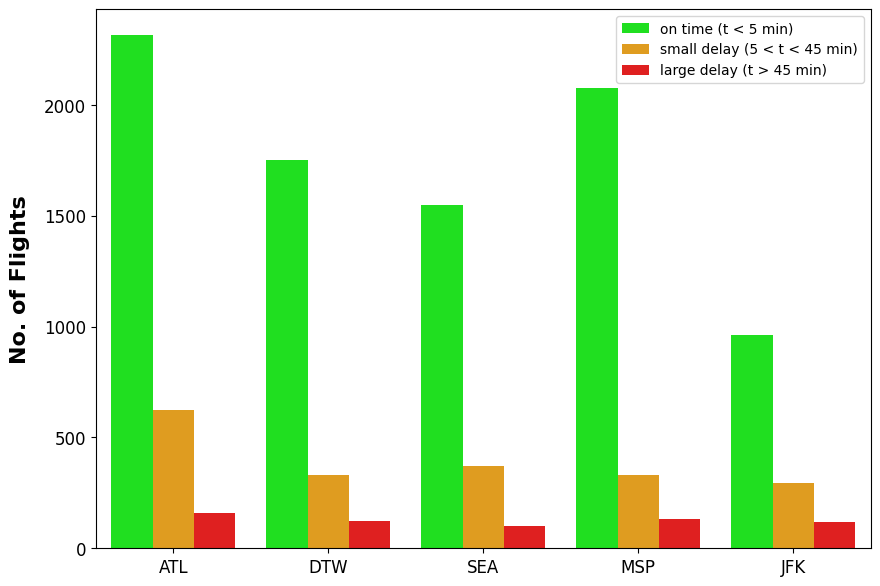

In [864]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEP_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="ORIGIN", hue='DELAY_LEVEL', data=df, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

C:\Users\saidi\AppData\Local\Temp\ipykernel_40516\184709428.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="DEST", y="DEP_DELAY", data=df, color="orange", ci=None)
C:\Users\saidi\AppData\Local\Temp\ipykernel_40516\184709428.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="DEST",y="ARR_DELAY",  data=df, color="b", hatch = 'X',


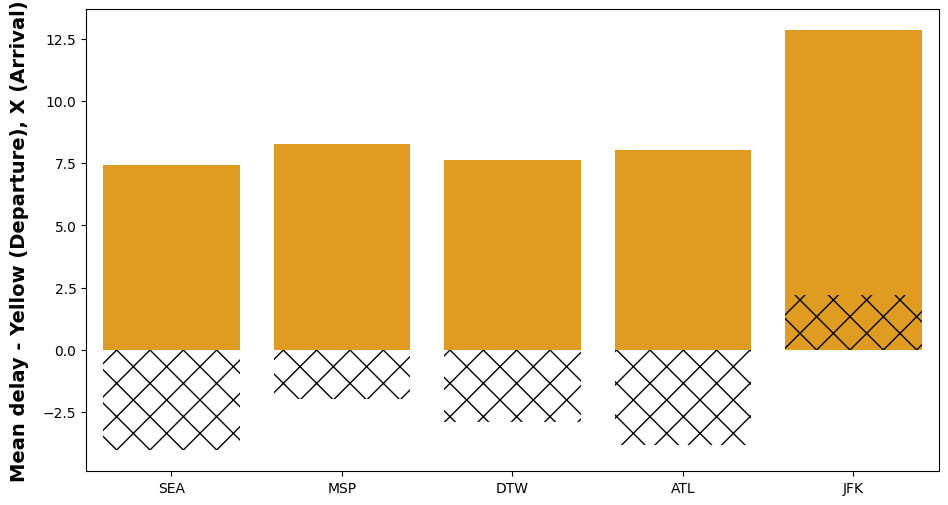

In [865]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEST", y="DEP_DELAY", data=df, color="orange", ci=None)
ax = sns.barplot(x="DEST",y="ARR_DELAY",  data=df, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Yellow (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

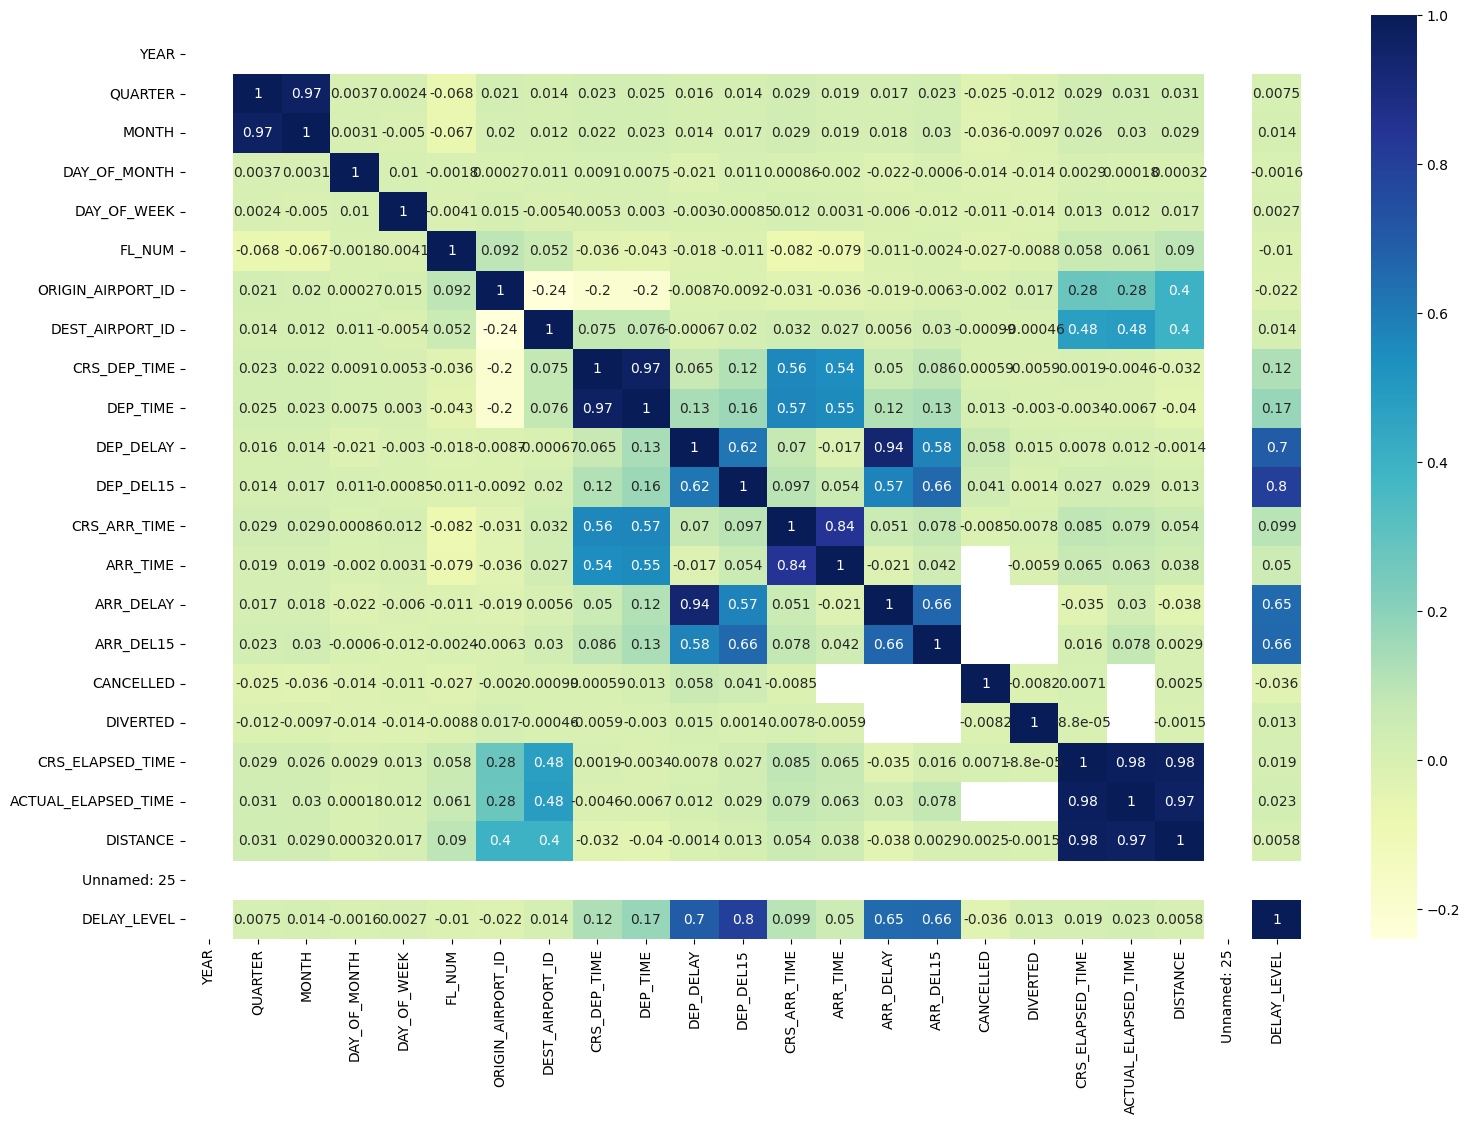

In [866]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Flights is your DataFrame

# Select only numeric columns for correlation
numeric_flights = df.select_dtypes(include=['number'])

# Create a subplot
plt.figure(figsize=(18, 12))

# Generate the heatmap for correlation
sns.heatmap(numeric_flights.corr(), annot=True, cmap="YlGnBu")

# Adjust the y-axis limits
b, t = plt.ylim()  # discover the values for bottom and top
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

# Show the plot
plt.show()


In [867]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25', 'DELAY_LEVEL'],
      dtype='object')

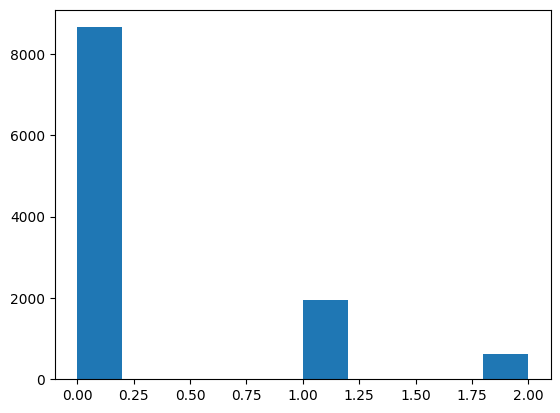

In [868]:
plt.hist(df['DELAY_LEVEL'])
plt.show()

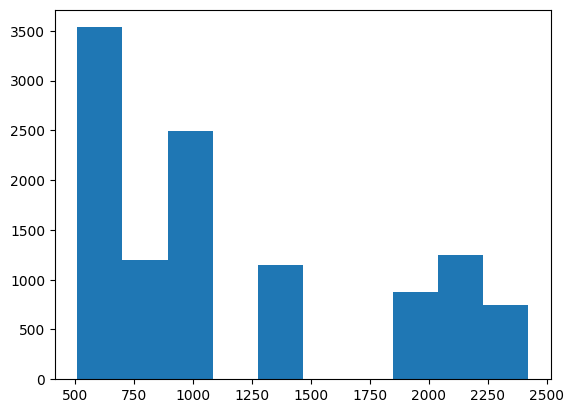

In [869]:
plt.hist(df['DISTANCE'])
plt.show()

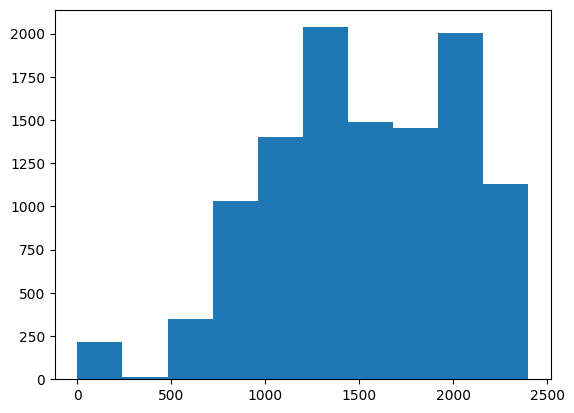

In [870]:
plt.hist(df['ARR_TIME'])
plt.show()

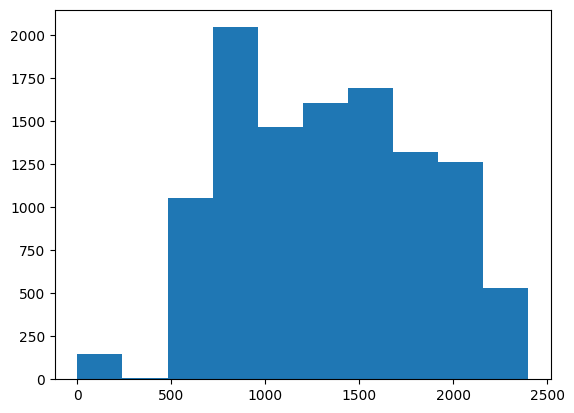

In [871]:
plt.hist(df['DEP_TIME'])
plt.show()

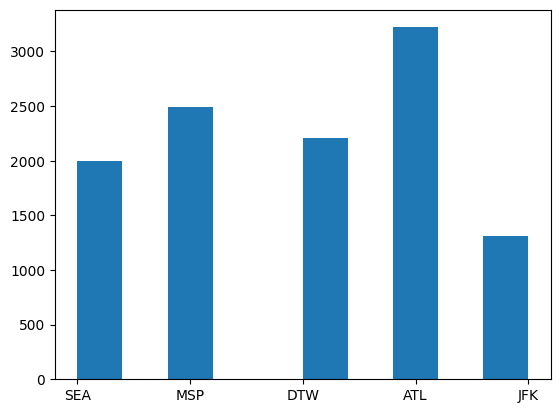

In [872]:
plt.hist(df['DEST'])
plt.show()

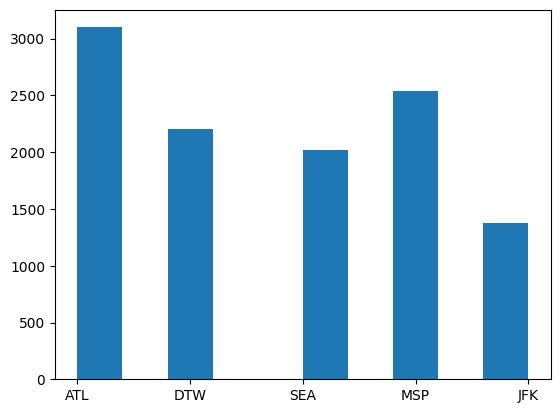

In [873]:
plt.hist(df['ORIGIN'])
plt.show()

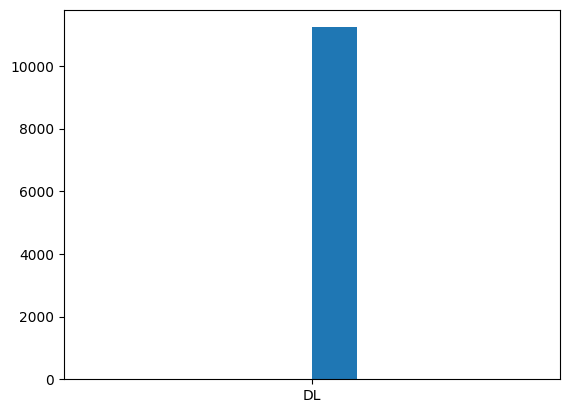

In [874]:
plt.hist(df['UNIQUE_CARRIER'])
plt.show()

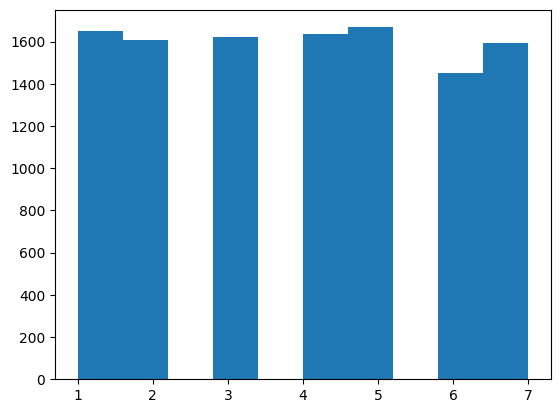

In [875]:
plt.hist(df['DAY_OF_WEEK'])
plt.show()

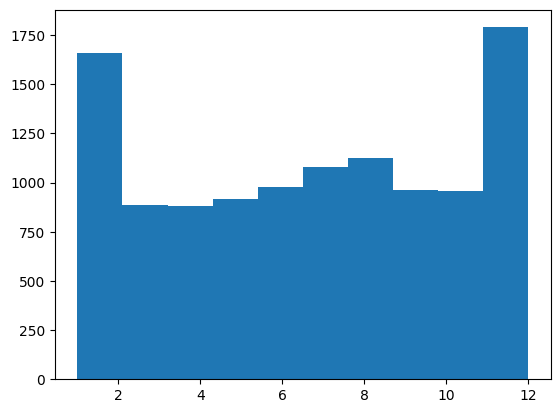

In [876]:
plt.hist(df['MONTH'])
plt.show()

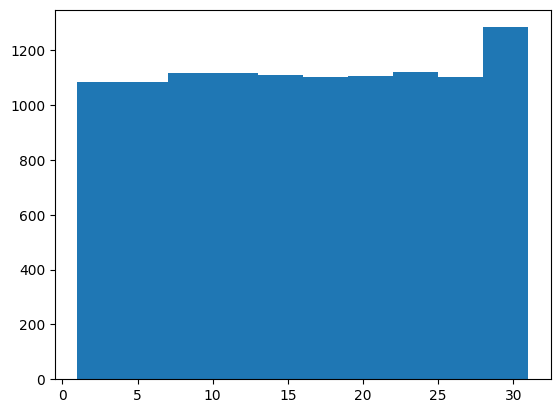

In [877]:
plt.hist(df['DAY_OF_MONTH'])
plt.show()

In [878]:
df.drop(['TAIL_NUM'], axis=1, inplace=True)

In [879]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,DL,1399,10397,ATL,14747,...,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN,0
1,2016,1,1,1,5,DL,1476,11433,DTW,13487,...,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN,0
2,2016,1,1,1,5,DL,1597,10397,ATL,14747,...,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN,0
3,2016,1,1,1,5,DL,1768,14747,SEA,13487,...,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN,0
4,2016,1,1,1,5,DL,1823,14747,SEA,11433,...,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN,0


In [880]:
df.drop(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], axis=1, inplace=True)

In [881]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,DL,1399,ATL,SEA,1905,...,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN,0
1,2016,1,1,1,5,DL,1476,DTW,MSP,1345,...,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN,0
2,2016,1,1,1,5,DL,1597,ATL,SEA,940,...,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN,0
3,2016,1,1,1,5,DL,1768,SEA,MSP,819,...,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN,0
4,2016,1,1,1,5,DL,1823,SEA,DTW,2300,...,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN,0


In [882]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'Unnamed: 25', 'DELAY_LEVEL'],
      dtype='object')

In [883]:
df.drop(['CRS_DEP_TIME','DEP_DELAY','DEP_DEL15','CRS_ARR_TIME','CANCELLED','ARR_DEL15','DIVERTED'], axis=1, inplace=True)

In [884]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,DL,1399,ATL,SEA,1907.0,2102.0,-41.0,338.0,295.0,2182.0,NaN,0
1,2016,1,1,1,5,DL,1476,DTW,MSP,1344.0,1439.0,4.0,110.0,115.0,528.0,NaN,0
2,2016,1,1,1,5,DL,1597,ATL,SEA,942.0,1142.0,-33.0,335.0,300.0,2182.0,NaN,0
3,2016,1,1,1,5,DL,1768,SEA,MSP,820.0,1345.0,10.0,196.0,205.0,1399.0,NaN,0
4,2016,1,1,1,5,DL,1823,SEA,DTW,2256.0,615.0,8.0,247.0,259.0,1927.0,NaN,0


In [885]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'FL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE',
       'Unnamed: 25', 'DELAY_LEVEL'],
      dtype='object')

In [886]:
df.drop(['CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME'], axis=1, inplace=True)

In [887]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,ARR_DELAY,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,DL,1399,ATL,SEA,1907.0,2102.0,-41.0,2182.0,NaN,0
1,2016,1,1,1,5,DL,1476,DTW,MSP,1344.0,1439.0,4.0,528.0,NaN,0
2,2016,1,1,1,5,DL,1597,ATL,SEA,942.0,1142.0,-33.0,2182.0,NaN,0
3,2016,1,1,1,5,DL,1768,SEA,MSP,820.0,1345.0,10.0,1399.0,NaN,0
4,2016,1,1,1,5,DL,1823,SEA,DTW,2256.0,615.0,8.0,1927.0,NaN,0


In [888]:
df.isnull().sum()

YEAR                  0
QUARTER               0
MONTH                 0
DAY_OF_MONTH          0
DAY_OF_WEEK           0
UNIQUE_CARRIER        0
FL_NUM                0
ORIGIN                0
DEST                  0
DEP_TIME            107
ARR_TIME            115
ARR_DELAY           188
DISTANCE              0
Unnamed: 25       11231
DELAY_LEVEL           0
dtype: int64

In [889]:
df1=df.dropna()

In [890]:
#rename ARR_DELAY to delay
df.rename(columns={'ARR_DELAY': 'delay'}, inplace=True)

In [891]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,DL,1399,ATL,SEA,1907.0,2102.0,-41.0,2182.0,NaN,0
1,2016,1,1,1,5,DL,1476,DTW,MSP,1344.0,1439.0,4.0,528.0,NaN,0
2,2016,1,1,1,5,DL,1597,ATL,SEA,942.0,1142.0,-33.0,2182.0,NaN,0
3,2016,1,1,1,5,DL,1768,SEA,MSP,820.0,1345.0,10.0,1399.0,NaN,0
4,2016,1,1,1,5,DL,1823,SEA,DTW,2256.0,615.0,8.0,1927.0,NaN,0


In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            11231 non-null  int64  
 1   QUARTER         11231 non-null  int64  
 2   MONTH           11231 non-null  int64  
 3   DAY_OF_MONTH    11231 non-null  int64  
 4   DAY_OF_WEEK     11231 non-null  int64  
 5   UNIQUE_CARRIER  11231 non-null  object 
 6   FL_NUM          11231 non-null  int64  
 7   ORIGIN          11231 non-null  object 
 8   DEST            11231 non-null  object 
 9   DEP_TIME        11124 non-null  float64
 10  ARR_TIME        11116 non-null  float64
 11  delay           11043 non-null  float64
 12  DISTANCE        11231 non-null  float64
 13  Unnamed: 25     0 non-null      float64
 14  DELAY_LEVEL     11231 non-null  int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 1.3+ MB


In [893]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,DL,1399,ATL,SEA,1907.0,2102.0,-41.0,2182.0,NaN,0
1,2016,1,1,1,5,DL,1476,DTW,MSP,1344.0,1439.0,4.0,528.0,NaN,0
2,2016,1,1,1,5,DL,1597,ATL,SEA,942.0,1142.0,-33.0,2182.0,NaN,0
3,2016,1,1,1,5,DL,1768,SEA,MSP,820.0,1345.0,10.0,1399.0,NaN,0
4,2016,1,1,1,5,DL,1823,SEA,DTW,2256.0,615.0,8.0,1927.0,NaN,0


In [894]:
#apply label encoder to UNIQUE_CARRIER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['UNIQUE_CARRIER'] = le.fit_transform(df['UNIQUE_CARRIER'])

In [895]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,0,1399,ATL,SEA,1907.0,2102.0,-41.0,2182.0,NaN,0
1,2016,1,1,1,5,0,1476,DTW,MSP,1344.0,1439.0,4.0,528.0,NaN,0
2,2016,1,1,1,5,0,1597,ATL,SEA,942.0,1142.0,-33.0,2182.0,NaN,0
3,2016,1,1,1,5,0,1768,SEA,MSP,820.0,1345.0,10.0,1399.0,NaN,0
4,2016,1,1,1,5,0,1823,SEA,DTW,2256.0,615.0,8.0,1927.0,NaN,0


In [896]:
#Apply to ORIGIN and DEST
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df['DEST'] = le.fit_transform(df['DEST'])

In [897]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,Unnamed: 25,DELAY_LEVEL
0,2016,1,1,1,5,0,1399,0,4,1907.0,2102.0,-41.0,2182.0,NaN,0
1,2016,1,1,1,5,0,1476,1,3,1344.0,1439.0,4.0,528.0,NaN,0
2,2016,1,1,1,5,0,1597,0,4,942.0,1142.0,-33.0,2182.0,NaN,0
3,2016,1,1,1,5,0,1768,4,3,820.0,1345.0,10.0,1399.0,NaN,0
4,2016,1,1,1,5,0,1823,4,1,2256.0,615.0,8.0,1927.0,NaN,0


In [898]:
df.drop(['Unnamed: 25'], axis=1, inplace=True)

In [899]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,DELAY_LEVEL
0,2016,1,1,1,5,0,1399,0,4,1907.0,2102.0,-41.0,2182.0,0
1,2016,1,1,1,5,0,1476,1,3,1344.0,1439.0,4.0,528.0,0
2,2016,1,1,1,5,0,1597,0,4,942.0,1142.0,-33.0,2182.0,0
3,2016,1,1,1,5,0,1768,4,3,820.0,1345.0,10.0,1399.0,0
4,2016,1,1,1,5,0,1823,4,1,2256.0,615.0,8.0,1927.0,0


In [900]:
df.drop(['YEAR'], axis=1, inplace=True)

In [901]:
df.drop(['QUARTER'], axis=1, inplace=True)

In [902]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,DELAY_LEVEL
0,1,1,5,0,1399,0,4,1907.0,2102.0,-41.0,2182.0,0
1,1,1,5,0,1476,1,3,1344.0,1439.0,4.0,528.0,0
2,1,1,5,0,1597,0,4,942.0,1142.0,-33.0,2182.0,0
3,1,1,5,0,1768,4,3,820.0,1345.0,10.0,1399.0,0
4,1,1,5,0,1823,4,1,2256.0,615.0,8.0,1927.0,0


In [903]:
df.isnull().sum()

MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
UNIQUE_CARRIER      0
FL_NUM              0
ORIGIN              0
DEST                0
DEP_TIME          107
ARR_TIME          115
delay             188
DISTANCE            0
DELAY_LEVEL         0
dtype: int64

In [904]:
df['DEP_TIME'].fillna(df['DEP_TIME'].mean(), inplace=True)

In [905]:
df.isnull().sum()

MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
UNIQUE_CARRIER      0
FL_NUM              0
ORIGIN              0
DEST                0
DEP_TIME            0
ARR_TIME          115
delay             188
DISTANCE            0
DELAY_LEVEL         0
dtype: int64

In [906]:
df['delay'].fillna(df['delay'].mean(), inplace=True)

In [907]:
df['ARR_TIME'].fillna(df['ARR_TIME'].mean(), inplace=True)

In [908]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,DELAY_LEVEL
0,1,1,5,0,1399,0,4,1907.0,2102.0,-41.0,2182.0,0
1,1,1,5,0,1476,1,3,1344.0,1439.0,4.0,528.0,0
2,1,1,5,0,1597,0,4,942.0,1142.0,-33.0,2182.0,0
3,1,1,5,0,1768,4,3,820.0,1345.0,10.0,1399.0,0
4,1,1,5,0,1823,4,1,2256.0,615.0,8.0,1927.0,0


In [909]:
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
UNIQUE_CARRIER    0
FL_NUM            0
ORIGIN            0
DEST              0
DEP_TIME          0
ARR_TIME          0
delay             0
DISTANCE          0
DELAY_LEVEL       0
dtype: int64

In [910]:
df.corr()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,DELAY_LEVEL
MONTH,1.000000,0.003095,-0.005027,NaN,-0.066573,0.019944,0.012047,0.022581,0.019047,0.018040,0.028921,0.014270
DAY_OF_MONTH,0.003095,1.000000,0.010415,NaN,-0.001812,0.000182,0.011307,0.007489,-0.001948,-0.022054,0.000320,-0.001619
DAY_OF_WEEK,-0.005027,0.010415,1.000000,NaN,-0.004133,0.014661,-0.005233,0.002999,0.003045,-0.005902,0.017456,0.002674
UNIQUE_CARRIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL_NUM,-0.066573,-0.001812,-0.004133,NaN,1.000000,0.088179,0.051955,-0.042950,-0.078504,-0.010947,0.089529,-0.009955
ORIGIN,0.019944,0.000182,0.014661,NaN,0.088179,1.000000,-0.246092,-0.198814,-0.035777,-0.017691,0.378138,-0.023090
DEST,0.012047,0.011307,-0.005233,NaN,0.051955,-0.246092,1.000000,0.074493,0.025512,0.006599,0.379111,0.014968
DEP_TIME,0.022581,0.007489,0.002999,NaN,-0.042950,-0.198814,0.074493,1.000000,0.553824,0.114674,-0.039523,0.174744
ARR_TIME,0.019047,-0.001948,0.003045,NaN,-0.078504,-0.035777,0.025512,0.553824,1.000000,-0.021245,0.038063,0.049569
delay,0.018040,-0.022054,-0.005902,NaN,-0.010947,-0.017691,0.006599,0.114674,-0.021245,1.000000,-0.037213,0.647340


In [911]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,DELAY_LEVEL
0,1,1,5,0,1399,0,4,1907.0,2102.0,-41.0,2182.0,0
1,1,1,5,0,1476,1,3,1344.0,1439.0,4.0,528.0,0
2,1,1,5,0,1597,0,4,942.0,1142.0,-33.0,2182.0,0
3,1,1,5,0,1768,4,3,820.0,1345.0,10.0,1399.0,0
4,1,1,5,0,1823,4,1,2256.0,615.0,8.0,1927.0,0


In [912]:
#convert output into delay or not
df['delay'] = df['delay'].apply(lambda x: 1 if x > 0 else 0)

In [913]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,delay,DISTANCE,DELAY_LEVEL
0,1,1,5,0,1399,0,4,1907.0,2102.0,0,2182.0,0
1,1,1,5,0,1476,1,3,1344.0,1439.0,1,528.0,0
2,1,1,5,0,1597,0,4,942.0,1142.0,0,2182.0,0
3,1,1,5,0,1768,4,3,820.0,1345.0,1,1399.0,0
4,1,1,5,0,1823,4,1,2256.0,615.0,1,1927.0,0


In [914]:
df.drop(['FL_NUM'], axis=1, inplace=True)

In [915]:
df.drop(['DAY_OF_MONTH'], axis=1, inplace=True)

In [916]:
df.drop(['MONTH'], axis=1, inplace=True)

In [917]:
df.head()

,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,delay,DISTANCE,DELAY_LEVEL
0,1,5,0,0,4,1907.0,0,2182.0,0
1,1,5,0,1,3,1344.0,1,528.0,0
2,1,5,0,0,4,942.0,0,2182.0,0
3,1,5,0,4,3,820.0,1,1399.0,0
4,1,5,0,4,1,2256.0,1,1927.0,0


In [918]:
#divide data into training and testing
from sklearn.model_selection import train_test_split
X = df.drop('delay', axis=1)
y = df['delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [919]:
X.head()

,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DISTANCE,DELAY_LEVEL
0,1,5,0,0,4,1907.0,2182.0,0
1,1,5,0,1,3,1344.0,528.0,0
2,1,5,0,0,4,942.0,2182.0,0
3,1,5,0,4,3,820.0,1399.0,0
4,1,5,0,4,1,2256.0,1927.0,0


In [920]:
#Apply standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [921]:
#Applying Linear Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [922]:
#predict on test data
y_pred = lr.predict(X_test)

In [923]:
#give confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1514  164]
 [ 202  367]]


In [924]:
#give the accuracy,precision and all
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8371161548731643


In [925]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [926]:
y_pred = dt.predict(X_test)

In [927]:
#give confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1381  297]
 [ 264  305]]


In [928]:
#print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7503337783711616


In [929]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [930]:
y_pred = rf.predict(X_test)

In [931]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1532  146]
 [ 253  316]]


In [932]:
#print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.822429906542056


In [933]:
#xgboost model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[21:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [934]:
y_pred = xgb.predict(X_test)

In [935]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1570  108]
 [ 247  322]]


In [936]:
#print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8420115709835336
